In [1]:
%load_ext autoreload
%autoreload 2

## Physics Informed Neural Networks to Approximate Solution of PDEs

In [2]:
from pinn import NNAnsatz, PINNTrainer
import matplotlib.pyplot as plt
import numpy as np

# Your task: Solve the system of equations using PINNs

System of two linear reaction-convection-diffusion equations

You will have to implement the following
1. initialize the approximate neural network solution
2. implement the functions add interior points, add temporal boundary points,
   and add spatial boundary points; 
3. implement the function apply initial condition;
4. implement the function apply boundary conditions;
5. implement the function compute pde residuals;
6. train the model.









# Setting up the training data

Just familiarize yourself with how we generate collocation points for the different types of residuals.

In [3]:
kwargs = {
    "alpha_f" :0.05 ,
    "h_f" : 5,
    "t_hot" : 4,
    "u_f" : 1,
    "alpha_s" : 0.08,
    "h_s" : 6,
    "t0" : 1,
}

In [11]:
# Solve the heat equation:
# u_t = u_xx, (t,x) in [0, 0.1]x[-1,1]
# with zero dirichlet BC and
# u(x,0)= -sin(pi * x).

n_sb = 64
n_tb = 64

pinn = PINNTrainer(n_sb, n_tb, **kwargs)

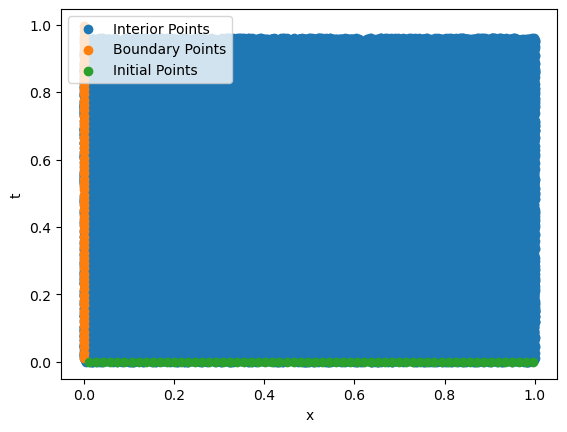

In [12]:
# Plot the input training points.
input_sb_, output_sb_ = pinn.add_spatial_boundary_points()
input_tb_, output_tb_ = pinn.add_temporal_boundary_points()
input_int_, output_int_ = pinn.add_interior_points()

plt.scatter(
    input_int_[:, 1].detach().numpy(),
    input_int_[:, 0].detach().numpy(),
    label="Interior Points")
plt.scatter(
    input_sb_[:, 1].detach().numpy(),
    input_sb_[:, 0].detach().numpy(),
    label="Boundary Points")
plt.scatter(
    input_tb_[:, 1].detach().numpy(),
    input_tb_[:, 0].detach().numpy(),
    label="Initial Points")

plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

# Training

Train your network and ensure your loss is low, and that your predictions are qualitatively similar to the true solution (plots should look similar).

################################  0  ################################
Total loss:  10.5276 | PDE Loss:  9.5239 | Function Loss:  8.4514
Total loss:  10.3439 | PDE Loss:  9.3375 | Function Loss:  8.5127
Total loss:  10.2163 | PDE Loss:  9.2124 | Function Loss:  8.166
Total loss:  9.9892 | PDE Loss:  8.976 | Function Loss:  8.4646
Total loss:  9.8149 | PDE Loss:  8.7987 | Function Loss:  8.378
Total loss:  9.7437 | PDE Loss:  8.7299 | Function Loss:  8.2384
Total loss:  9.4994 | PDE Loss:  8.465 | Function Loss:  8.3811
Total loss:  9.3131 | PDE Loss:  8.2685 | Function Loss:  8.302
Total loss:  9.2765 | PDE Loss:  8.2356 | Function Loss:  8.2297
Total loss:  9.0828 | PDE Loss:  8.0056 | Function Loss:  8.2945
Total loss:  8.8889 | PDE Loss:  7.7839 | Function Loss:  8.2206
Total loss:  8.8294 | PDE Loss:  7.7187 | Function Loss:  8.1816
Total loss:  8.7502 | PDE Loss:  7.6144 | Function Loss:  8.1793
Total loss:  8.6806 | PDE Loss:  7.5384 | Function Loss:  8.1264
Total loss:  8.6434 | 

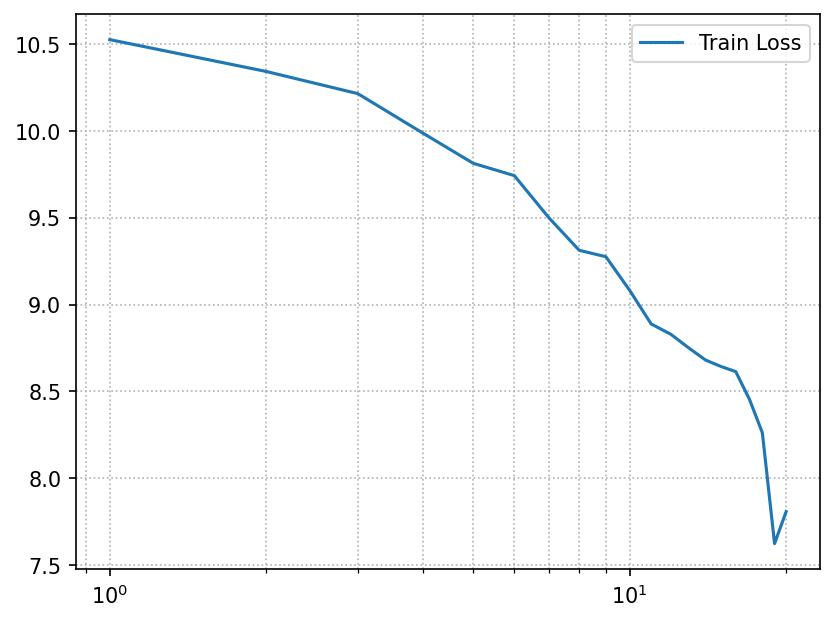

In [14]:
hist = pinn.fit(num_epochs=1, verbose=True)

plt.figure(dpi=150)
plt.grid(True, which="both", ls=":")
plt.plot(np.arange(1, len(hist) + 1), hist, label="Train Loss")
plt.xscale("log")
plt.legend()

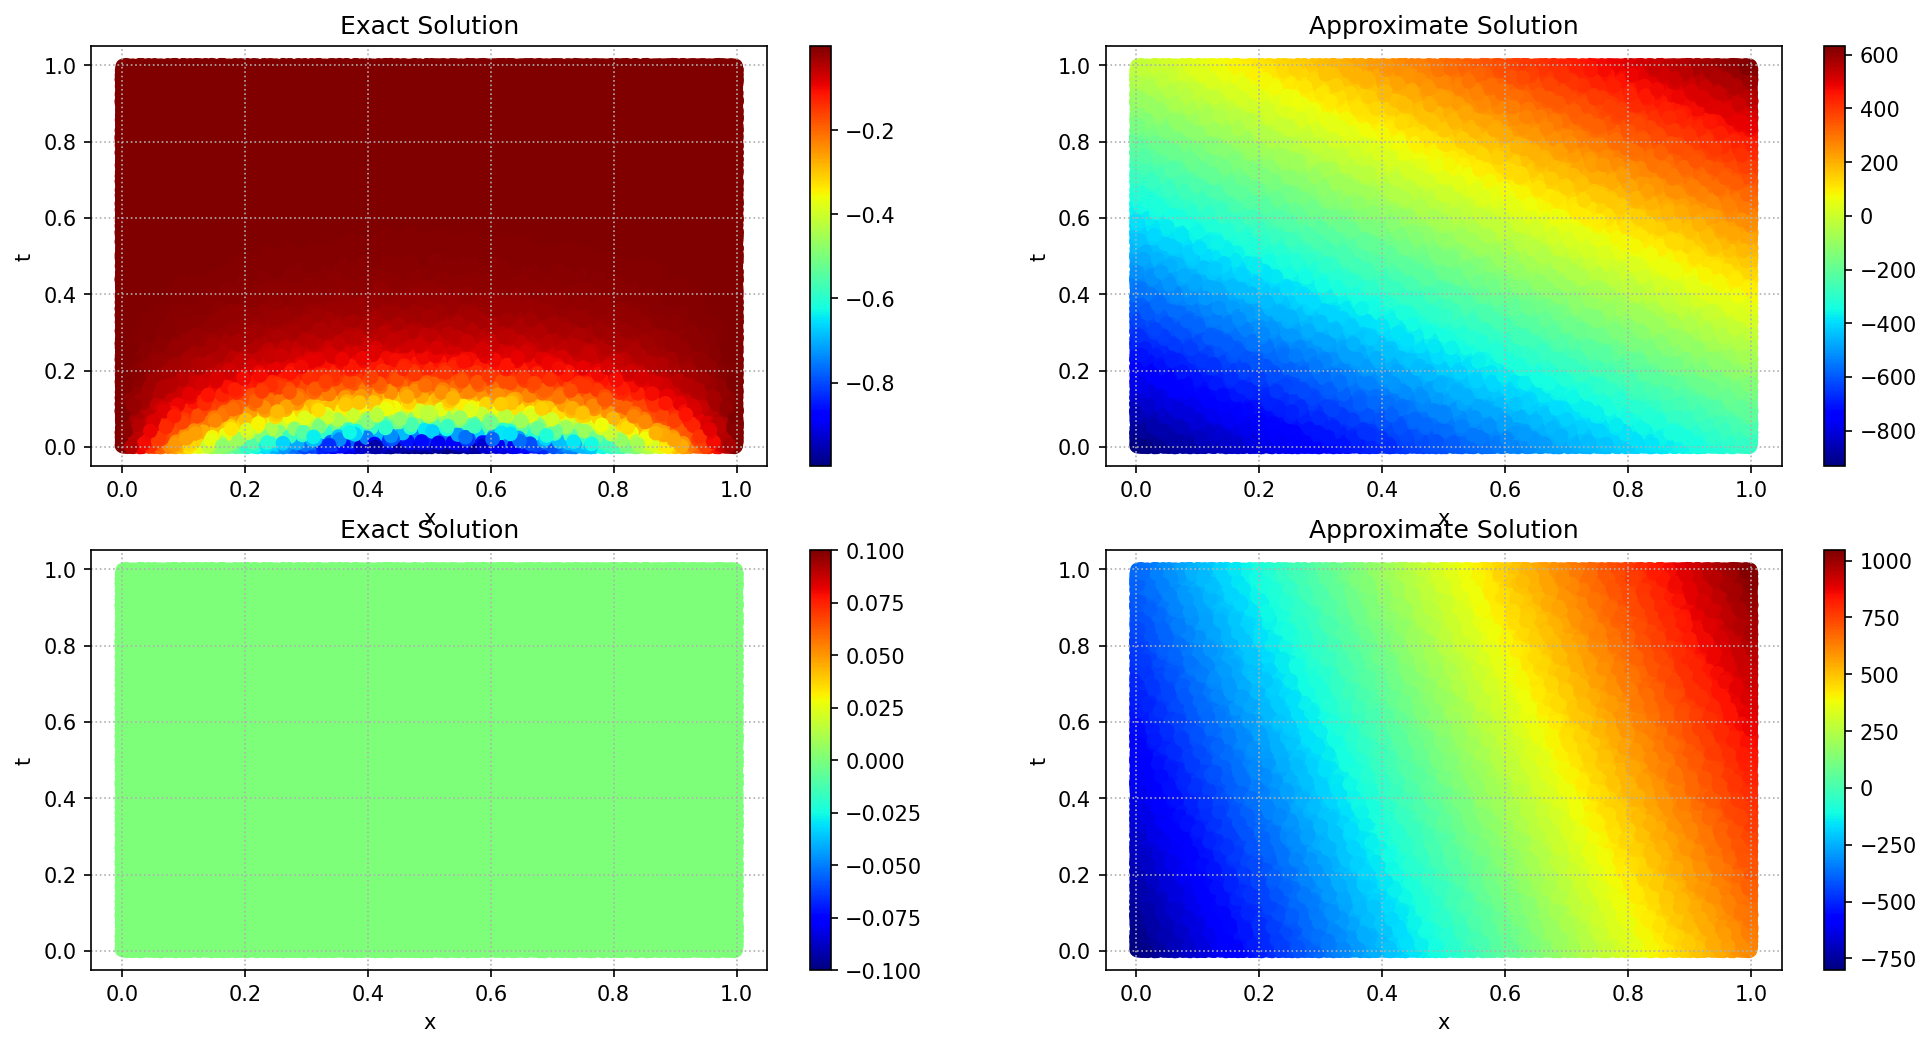

L2 Relative Error Norm:  359886.21875 %


In [24]:
pinn.plot()